## Analysis of Roller Coaster DB 

Here we will be analyzing the roller coaster dataset which can be found on Kaggle. Without prior knowledge of this dataset, the goal is to explore, visualize, and understand relationships apparent within the data.



In [1]:
#Begin by importing useful libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pylab as plt 

#Will use ggplot to make plotting seamless with previous R experience
plt.style.use('ggplot')

#By default pandas will not allow us to see all columns, change option to greater value
#200 should be more than enough to view all cols in dataset
pd.set_option('max_columns', 200)


In [2]:
#Import dataset as csv from local machine
coasters = pd.read_csv("/Users/alejandroarellano/Desktop/Python/Learning Pandas/coaster_db.csv")


### First: Understanding and Exploration 

The first thing we want to do is gain a better understanding of the dataset; general data contained, data types, number of vars, etc. I want to view the data and look through some of it before moving on with analysis. 

In [3]:
#Understanding row/column count
coasters.shape

(1087, 56)

In [4]:
#Viewing first 5 rows within dataset
coasters.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


First impressions are that this dataset contains a lot of NA values. Will keep those in mind moving forward. We also want to list out the column names. In the future, we may create a subset of data by removing some of those columns. We also want to see the dtype for each column; each column in a pandas dataset is a series and pandas assigns dtypes to each of those. 

I have also noticed that there are columns which describe similar characteristics of the coasters such as speed and height, but using different data types, we may want to remove these later. 

In [5]:
coasters.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
coasters.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

Finally, I want to see some descriptive statistics for the dataset so I will use the describe() function.

In [7]:
coasters.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


### Second: Data Prep

Before moving on, I want to prepared and clean this data to contain only information that I deem to be relevant for analysis. I also want to identify/remove duplicate columns, or rename columns for clarity. 

In [8]:
#Creating subset by selecting cols to keep and reassigning to dataset
coasters = coasters[['coaster_name', 'Location', 'Status', 'Manufacturer', 
                     'year_introduced', 'latitude', 'longitude', 'Type_Main',
                     'opening_date_clean', 'speed_mph', 'height_ft',
                     'Inversions_clean', 'Gforce_clean']].copy()

#copy() will tell pd that is it a new dataframe and not a reference to the old one 
#If we just wanted to drop one col we could use drop, axis=1 tells pd that we are dropping a col not a row
#coasters.drop(['coaster_name'], axis=1)


In [9]:
#Shows that coasters dataframe has been modified
coasters.shape

(1087, 13)

In [10]:
#View the subset using previous methods
coasters.head(5)
coasters.dtypes
coasters.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

opening_date_clean should be a date col not a object dtype, so we will change that manually.

In [11]:
coasters['opening_date_clean'] = pd.to_datetime(coasters['opening_date_clean'])

#Could do the same if we wanted to change something to numeric by using pd.to_numeric


There are some columns that we need to rename for clarity

In [12]:
#Rename using a dictionary, 'old_name' : 'New_Name'
#Once again we will reassign the object to include these new column names 
coasters = coasters.rename(columns = {'coaster_name': 'Coaster_Name',
                           'year_introduced':'Year_Introduced',
                          'latitude':'Latitude',
                          'longitude':'Longitude',
                          'opening_date_clean':'Opening_Date',
                          'speed_mph':'Speed_MPH',
                          'height_ft':'Height_ft',
                          'Inversions_clean':'Inversions',
                          'Gforce_clean':'Gforce'})

In [13]:
#Check to make sure everything has been correctly named
coasters.head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


Now we will check for NA values per col

In [14]:
coasters.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_MPH          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

We also want to check for any duplicate rows

In [15]:
#We can see here that none of the rows are dups 
coasters.loc[coasters.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_ft,Inversions,Gforce


The above only shows if the entire row is duplicated, but we may want to use the same method on a subset to check for duplicate values within specific fields. 

In [16]:
#Check for duplicate values in Coaster_Name col
coasters.loc[coasters.duplicated(subset = ['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


The above shows a list of duplicated rows from the second time they appear. We can see that there are 97 duped rows. We may want to explore why those duplicates appear rather than removing them without analysis. 

In [17]:
#Will check one of the rows to see why it was duped
coasters.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


Checking one of the coasters, shows that it has different years of introduction. It could be that the coaster was introduced, the closed in the same year, then opened in the next year for example. For simple errors like this, we will remove rows that have identical values for a subset of columns.

- Will remove the rows where dups have identical values for the following subset 
- Then we will reassign our dataframe to include only the non-duped rows
    - ~ allows us to choose the inverse of the dups 
- Dropping rows will cause the index to jump over the dropped row numbers, to fix this we can reset the index then drop the added index col

In [18]:
coasters = coasters.loc[~coasters.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index(drop = True).copy()


In [19]:
#Checking shape of df after changes
coasters.shape

(990, 13)

### Third: Feature Understanding

Now we will conduct some univariate analysis and visualization which will allow us to better understand the nature of this data.

We will look at some of the following feature distributions:
- Histogram
- KDE
- Box Plot

In [20]:
 #Let's take a look at the year introduced
#Returns count for each of the unique values in the column and order from greatest to least count
coasters['Year_Introduced'].value_counts()

#Using value_counts to find number of occurances for specific value
#coasters['Year_Introduced'].value_counts()[2013]


1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

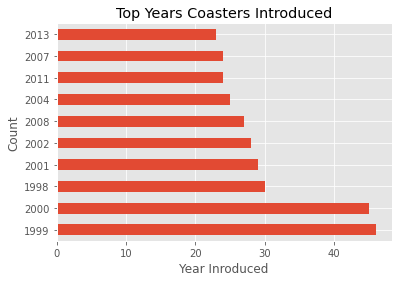

In [21]:
#We can plot value counts. We will only plot top 10 years from value_counts
#Using kind = 'bar' will give a vertical bar plot
ax = coasters['Year_Introduced'].value_counts()\
.head(10).plot(kind = 'barh', title = 'Top Years Coasters Introduced')

#Since we saved this as a matplotlib axis, we can now add some extra info
ax.set_xlabel('Year Inroduced')
ax.set_ylabel('Count')


From the top 10 years of coaster openings, 1999 had the most at 46 and 2013 had the least with 23 coaster introductions.

Let's visualize coaster speed with a histogram now.

Text(0.5, 0, 'Speed (MPH)')

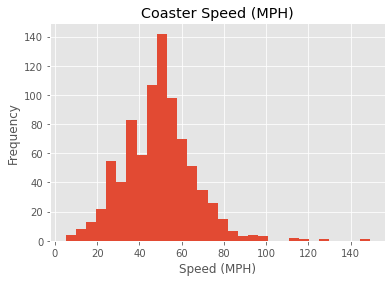

In [22]:
ax = coasters['Speed_MPH']\
.plot(kind = 'hist', bins = 30, title = 'Coaster Speed (MPH)')
ax.set_xlabel('Speed (MPH)')


In [23]:
coasters.describe()

,Year_Introduced,Latitude,Longitude,Speed_MPH,Height_ft,Inversions,Gforce
count,990.000000,783.000000,783.000000,850.000000,159.000000,990.000000,324.000000
mean,1994.054545,38.375748,-41.591138,49.017647,103.994340,1.308081,3.815093
std,23.872027,15.549452,72.326633,16.847266,68.293609,2.026876,1.009229
min,1884.000000,-48.261700,-123.035700,5.000000,13.100000,0.000000,0.800000
25%,1988.000000,35.100350,-85.745650,37.300000,52.150000,0.000000,3.375000
50%,2000.000000,40.289700,-76.653500,50.000000,91.900000,0.000000,4.000000
75%,2009.000000,44.799750,2.863400,58.000000,133.850000,2.000000,4.500000
max,2022.000000,63.230900,153.426500,149.100000,377.300000,14.000000,12.000000


We can run similar analysis on each one of our features. 

This histogram gives some interesting insight like our average speed seems to be somewhere around 49.01 mph with our median being 50.00 mph. For the most part, the data seems to have normal distribution but the values off to the right create a right skew. There are also some values which may be considered outliers which we will confirm later. 

let's look at a density plot for speed. 

Text(0.5, 0, 'Speed (MPH)')

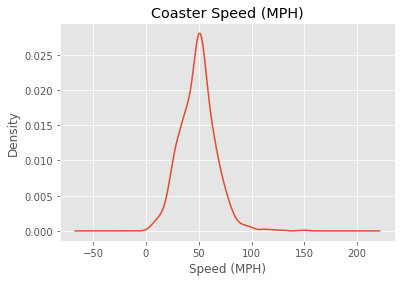

In [24]:
#Kernal Density Plot 
ax = coasters['Speed_MPH']\
.plot(kind = 'kde', title = 'Coaster Speed (MPH)')
ax.set_xlabel('Speed (MPH)')

Text(0, 0.5, 'MPH')

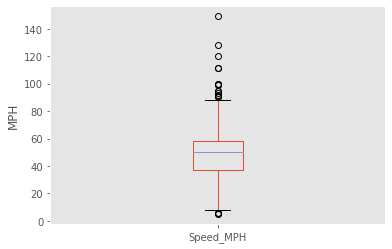

In [34]:
ax = coasters.boxplot(column = ['Speed_MPH'], grid = False)
ax.set_ylabel('MPH')

We can see now that there are several outliers in the speed column. 

### Fourth: Relationships

 Now we will attempt to understand the relationships between features in the dataset using the following:
 
 - Scatterplot
 - Heatmap Correlation 
 - Pairplot 
 - Groupby Comparison 

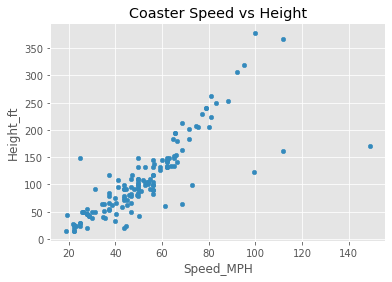

In [40]:
coasters.plot(kind = 'scatter', 
              x = 'Speed_MPH',
              y = 'Height_ft',
             title = 'Coaster Speed vs Height')
#plt.show() will remove the subplot information and just display the plot itself
plt.show()

The above is a pandas object but we can make slightly more complicated or advance plots using seaborn (sns).

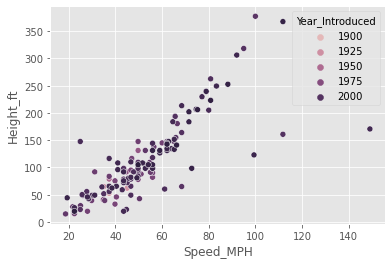

In [50]:
#Plot shows speed vs height with year introduced as the hue of each point
sns.scatterplot(x = 'Speed_MPH',
               y = 'Height_ft',
                hue = 'Year_Introduced',
                data = coasters)
plt.show()

 We can also compare multiple variables in sns using a pair plot. This will give us a matrix of scatterplots comparing the variables that we select.

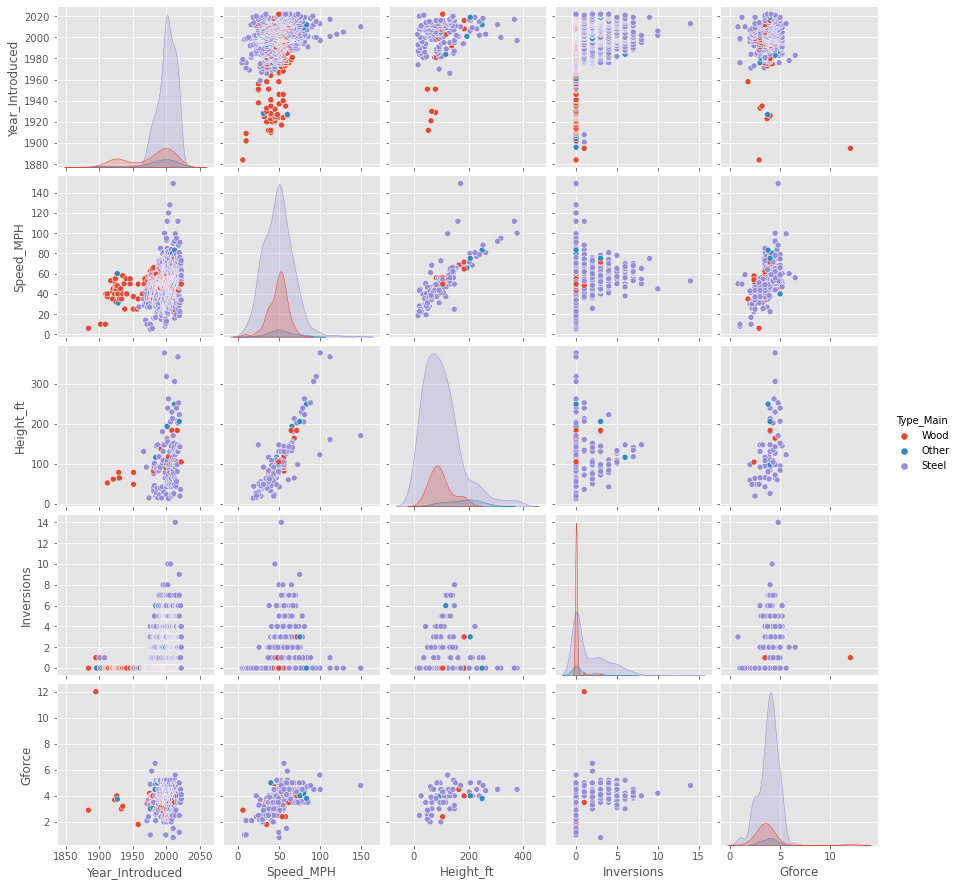

In [55]:
#Pairplot(matrix) comparing variables with material type used to build the coaster as the hue.
sns.pairplot(data = coasters, vars=['Year_Introduced', 'Speed_MPH',
                                   'Height_ft', 'Inversions','Gforce'],
                                hue = 'Type_Main')
plt.show()

We may also want to run a correlation analysis for our numeric variables where we can view the correlation strength between these variables at once. 

In [58]:
#Correlation matrix
coasters_corr = coasters[['Year_Introduced', 
          'Speed_MPH', 
          'Height_ft', 
          'Inversions', 
          'Gforce']].dropna().corr()

<AxesSubplot:>

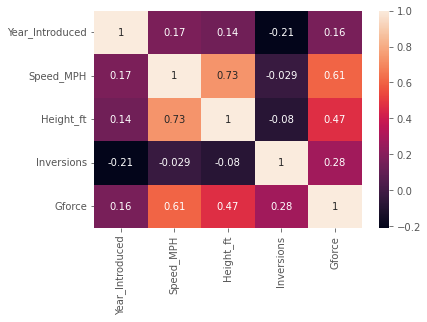

In [60]:
#Correlation heatmap
sns.heatmap(coasters_corr, annot = True)

### Fifth: Asking Questions

As part of our exploration, we may want to develop some questions and attempt to answer those questions through analysis, using a specific plot or statistic, or using a test for significance.

- Question: Which locations have the fastest roller coasters (with a minimum of 10 coasters at said location)?

In [74]:
#Let's find the coaster count per location, average speed, and only locations wit count greater than 10 
#Location has a value called 'Other', we will remove that and group by location
coasters.query('Location != "Other"')\
.groupby('Location')['Speed_MPH']\
.agg(['mean','count'])\
.query('count >= 10')\
.sort_values('mean', ascending = False)


,mean,count
Location,,
Busch Gardens Williamsburg,58.318182,11
Cedar Point,57.833333,18
Six Flags Magic Mountain,57.241176,17
Canada's Wonderland,53.533333,12
Six Flags Great Adventure,53.036364,11
Kings Dominion,52.083333,12
Hersheypark,50.576923,13
Kings Island,49.273684,19
Carowinds,43.571429,14


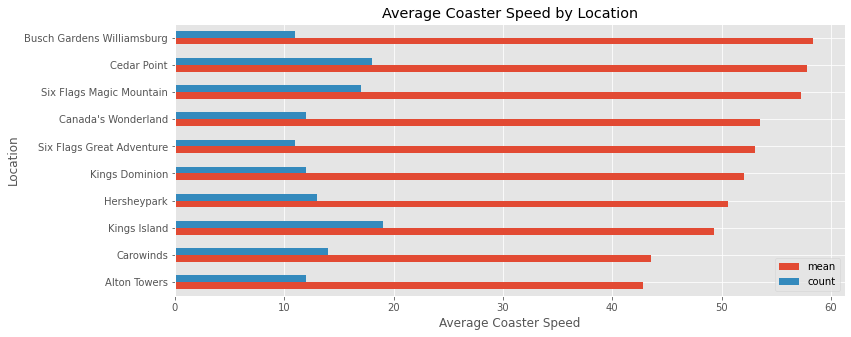

In [84]:
#Plot for avg speed and coaster count per location
ax = coasters.query('Location != "Other"')\
.groupby('Location')['Speed_MPH']\
.agg(['mean','count'])\
.query('count >= 10')\
.sort_values('mean')\
.plot(kind = 'barh', figsize=(12, 5), title = 'Average Coaster Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()


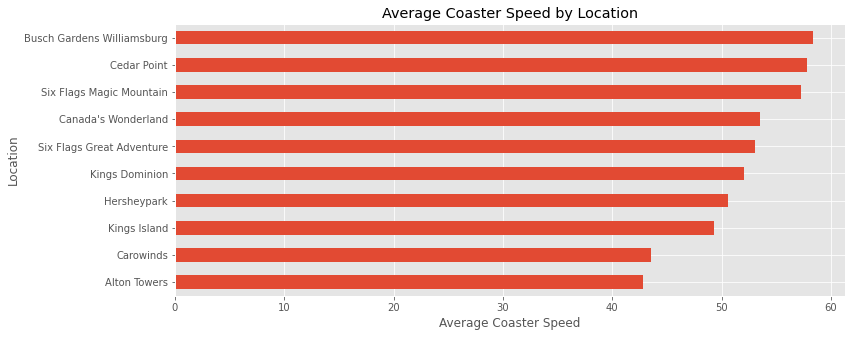

In [85]:
#Plot for avg speed and per location
ax = coasters.query('Location != "Other"')\
.groupby('Location')['Speed_MPH']\
.agg(['mean','count'])\
.query('count >= 10')\
.sort_values('mean')['mean']\
.plot(kind = 'barh', figsize=(12, 5), title = 'Average Coaster Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()

If we wanted to visit the park with the highest average speed for their coasters where the coaster count at the park is 10 or more, we would first visit Busch Gardens Williamsburg, the Cedar Point, then Six Flags Magic Mountain.